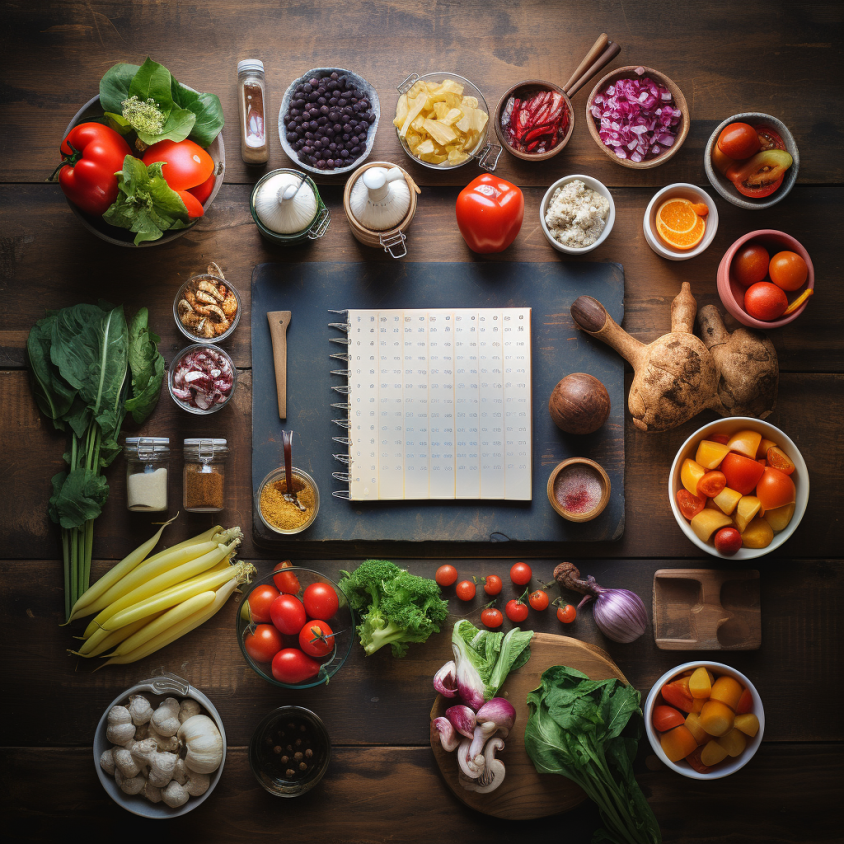

In [1]:
# Import healthy2.png image
from IPython.display import Image
Image(filename='recipe2.png')



<H1 size =10><center>IE Sustainability Datathon 2023 </center></H1>
<HR></HR>
<H2 size =7><center> Predictive Maintenance on a Gas Network</center></H2>

# Table of Contents 

# Written Report 

Your written report should include both code, output and written text summaries of the following:

Data Validation:
Describe validation and cleaning steps for every column in the data
Exploratory Analysis:
Include two different graphics showing single variables only to demonstrate the characteristics of data
Include at least one graphic showing two or more variables to represent the relationship between features
Describe your findings
Model Development
Include your reasons for selecting the models you use as well as a statement of the problem type
Code to fit the baseline and comparison models
Model Evaluation
Describe the performance of the two models based on an appropriate metric
Business Metrics
Define a way to compare your model performance to the business
Describe how your models perform using this approach
Final summary including recommendations that the business should undertak

# Data Science Professional 

## Data Validation



From: Stef To: Head of Data Science Subject: Report on the assigned project

1) Data Validation 

__recipe__: 
- 947 unique identifiers without missing values. No cleaning is needed
  
__calories, carbohydrate, sugar, protein__:

First, the data contains 52 NaN values in calories, carbohydrate, sugar, protein. I tried to use Median and Mode, however it didn't work out well, so I abandoned the idea as the results of the model turned out to be worse, so the decision was to drop 52 missing rows. For all we used Power Transformer to to make the data more normally distributed.

- calories -895 non-null values, NA rows dropped, extreme outliers (Q3 + 3 IQR) were capped, scaled using MinMax 
- carbohydrate - 895 non-null values, NA rows dropped, extreme outliers (Q3 + 3 IQR) were capped, scaled using MinMax sugar 

- sugar - 895 non-null values,NA rows dropped, extreme outliers (Q3 + 3 IQR) were capped, scaled using MinMax protein 
- protein - 895 non-null values, NA rows dropped, extreme outliers (Q3 + 3 IQR) were capped, scaled using MinMax category 

__Category__:
- 11 unique values without missing values,whereas there were 10 values in the description.'Chicken Breast' values for changed to 'Chicken', then columns were one hot encoded 
  
__Servings__:    
- 6 unique values without missing values. y description, it should be numeric variable, but now it's character. 2 values contained 'as a snack', they belonged to Lunch/Snack category so 'as a snack' was removed, the column was transformed to type to integer
  
__high_traffic__ 
- High traffic also has missing values (373) but in this case, it is not missing at random, so I just replaced NA values with Not High, NaN values were replaced with 'low' and then changed to 1 - high, 0 - not high


- Checking for correlation: I used visualiziation and statistical methods to check the correlation between the different columns of the data
- Adding new features: making new features depending on the information gained from the data to supports our insights. Healthy and difficulty prepareing a meal has been created


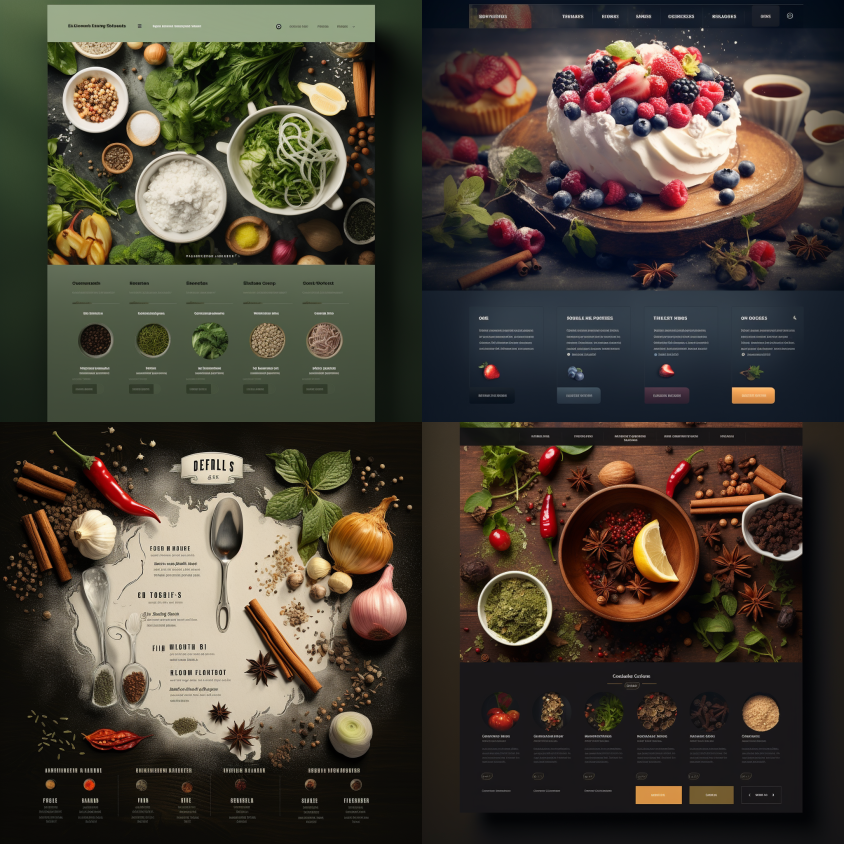

In [2]:
# Import healthy2.png image
from IPython.display import Image
Image(filename='website3.png')

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from scipy.stats import ttest_ind

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
df = pd.read_csv("recipe_site_traffic_2212.csv")
df

recipe  calories  carbohydrate  sugar  protein      category servings  \
0         1       NaN           NaN    NaN      NaN          Pork        6   
1         2     35.48         38.56   0.66     0.92        Potato        4   
2         3    914.28         42.68   3.09     2.88     Breakfast        1   
3         4     97.03         30.56  38.63     0.02     Beverages        4   
4         5     27.05          1.85   0.80     0.53     Beverages        4   
..      ...       ...           ...    ...      ...           ...      ...   
942     943   1161.00          5.31  22.39    44.22  Lunch/Snacks        2   
943     944       NaN           NaN    NaN      NaN        Potato        2   
944     945    951.74         29.42   3.57    13.87          Pork        2   
945     946    266.61         35.77   0.97     8.07        Potato        6   
946     947    184.56         45.21   6.20     0.03     Beverages        4   

    high_traffic  
0           High  
1           High  
2            NaN  
3           High  
4            NaN  
..           ...  
942          NaN  
943         High  
944         High  
945         High  
946          NaN  

[947 rows x 8 columns]

In [5]:
# Set index as recipe
df = df.set_index('recipe')

In [6]:
# get statistical summary
df.describe()

calories  carbohydrate       sugar     protein
count   895.000000    895.000000  895.000000  895.000000
mean    435.939196     35.069676    9.046547   24.149296
std     453.020997     43.949032   14.679176   36.369739
min       0.140000      0.030000    0.010000    0.000000
25%     110.430000      8.375000    1.690000    3.195000
50%     288.550000     21.480000    4.550000   10.800000
75%     597.650000     44.965000    9.800000   30.200000
max    3633.160000    530.420000  148.750000  363.360000

In [7]:
# Check for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes

missing_values, data_types

(calories         52
 carbohydrate     52
 sugar            52
 protein          52
 category          0
 servings          0
 high_traffic    373
 dtype: int64,
 calories        float64
 carbohydrate    float64
 sugar           float64
 protein         float64
 category         object
 servings         object
 high_traffic     object
 dtype: object)

| Missing Values | Columns                                                |
|-------------|---------------------------------------------------------|
| 52   | </br> calories, carbohydrate, sugar, and protein columns. |
| 373        |  </br>high_traffic  |


Data Types:
 - calories, carbohydrate, sugar, and protein are of type float, which is also appropriate for these columns.
 - category and high_traffic are of type object (likely strings), which is expected.
 - servings is of type object, which might be a *concern* if we expect it to be numerical.

In [8]:
#replace NaN in high Traffic with Low
df['high_traffic'].fillna('Low', inplace=True)

In [9]:
# Check the number of rows in the dataset
total_rows = len(df)

# Calculate the proportion of missing values for affected columns
missing_proportions = missing_values / total_rows

total_rows, missing_proportions[['calories', 'carbohydrate', 'sugar', 'protein', 'high_traffic']]


(947,
 calories        0.054910
 carbohydrate    0.054910
 sugar           0.054910
 protein         0.054910
 high_traffic    0.393875
 dtype: float64)

> It is helpful to know the size of the dataset and the proportion of missing values. You can see that for high traffic 40% has been missing. For high_traffic, we can replace the NaN values with 'Low' to indicate non-high traffic.

In the current context, given that only about 5.49% of data is missing in some columns, it makes sense to impute them (using the median, mean), but both show the model performance is not performing well. So we disregard the option and drop them eventually 

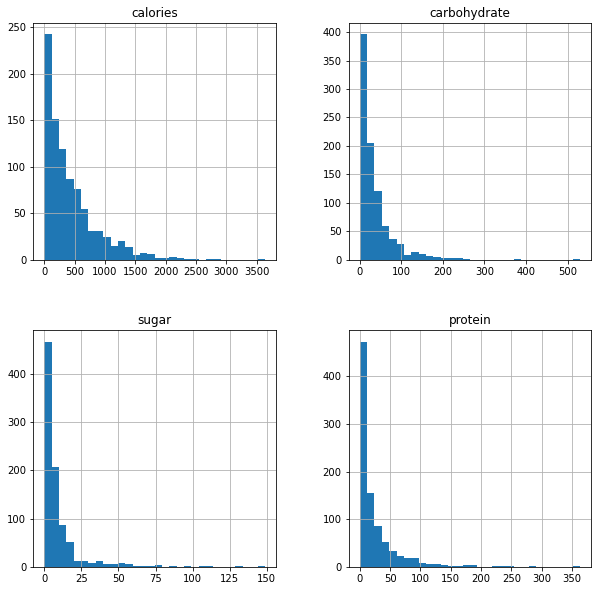

In [10]:
#plot all columns to see the distribution
df.hist(figsize=(10,10), bins=30)
plt.show()

Description of Findings (Histogram for Calories):

The majority of recipes have caloric content ranging between approximately 0 to 200 calories.
The distribution is right-skewed, meaning there are a few recipes with a much higher caloric content that extends towards the right tail.
There's a noticeable peak around the 100-150 calorie range, suggesting that many recipes fall within this caloric content.

Let's eximine the data and unique values 

In [11]:
# Check unique values in 'category', 'servings', and 'high_traffic' columns
category_unique_values = df['category'].unique()
servings_unique_values = df['servings'].unique()
high_traffic_unique_values = df['high_traffic'].unique()

category_unique_values, servings_unique_values, high_traffic_unique_values


(array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
        'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
        'Dessert'], dtype=object),
 array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object),
 array(['High', 'Low'], dtype=object))

category:
 - The values seem consistent, and there aren't any evident spelling mistakes but Chicken Breast and Chicken could be put together.

servings:
- We see values like '4 as a snack' and '6 as a snack'. These entries have additional text, which is likely why the column is of type 'object'. We might want to clean these values to extract the numerical part and convert the entire column to a numerical type.
  
high_traffic:
- The values are either 'High' or NaN (missing). If this column is supposed to indicate high traffic, we might want to replace NaN with something like 'Low' or another appropriate value.


In [12]:
# Chicken and Chicken Breast can be put together, replace Chicken Breast with Chicken
df['category'].replace('Chicken Breast', 'Chicken', inplace=True)

The code categorizes items in the DataFrame as healthy or not based on their category and nutritional values, and then adds a new column to the DataFrame to store this binary classification.

In [13]:
def determine_healthiness(row):
    if row['category'] == 'Vegetable':
        return 1
    elif (row['calories'] <= 400 and 
          row['carbohydrate'] >= 15 and 
          row['carbohydrate'] <= 80 and 
          row['sugar'] <= 10 and 
          row['protein'] >= 10):
        return 1
    else:
        return 0

# Apply the function to each row of the dataframe
df['healthy'] = df.apply(determine_healthiness, axis=1)





In [14]:
# Extract numerical values from the 'servings' column and convert to integer
df['servings'] = df['servings'].str.extract('(\d+)').astype(int)

# Check the unique values in 'servings' after cleaning
servings_unique_values_cleaned = df['servings'].unique()
servings_unique_values_cleaned


array([6, 4, 1, 2])

In [15]:
df['category'].unique()


array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert'],
      dtype=object)

In [16]:
#Difficulty 

category_points = {'Beverages': 1, 'Breakfast': 1, 'Chicken': 3, 'Dessert': 4,
                   'Lunch/Snacks': 3, 'Meat': 4, 'One Dish Meal': 3, 'Pork': 4, 'Potato': 1, 'Vegetable': 1}

# Create a dictionary to map servings to difficulty points

# Create a new column "difficulty" by mapping the category and servings to their corresponding points
df['difficulty'] = df['category'].map(category_points) + df['servings']
df[['difficulty','high_traffic']].groupby('difficulty').value_counts()

difficulty  high_traffic
2           Low              39
            High             29
3           High             39
            Low              30
4           High             43
            Low              23
5           High            153
            Low             112
6           High             33
            Low              13
7           High            111
            Low              97
8           High             83
            Low              20
9           High             41
            Low              25
10          High             42
            Low              14
dtype: int64

In [17]:
high_traffic_df = df[df['high_traffic'] == 'High']
low_traffic_df = df[df['high_traffic'] == 'Low']


t, p = ttest_ind(high_traffic_df['difficulty'], low_traffic_df['difficulty'])
print("t-statistic for difficulty: ", t)
print("p-value for difficulty: ", p,'\n')

t-statistic for difficulty:  3.7566960679931305
p-value for difficulty:  0.00018271137797831383 



In [18]:
def rank_difficulty(value):
    if 2 <= value <= 4:
        return 1  # Easy
    elif 5 <= value <= 7:
        return 2  # Medium
    elif 8 <= value <= 10:
        return 3  # Hard
    else:
        return None  # For values outside the range or missing data

df['difficulty'] = df['difficulty'].apply(rank_difficulty)


In [19]:
df[['difficulty','high_traffic']].groupby('difficulty').value_counts()


difficulty  high_traffic
1           High            111
            Low              92
2           High            297
            Low             222
3           High            166
            Low              59
dtype: int64

In [20]:
high_traffic_df = df[df['high_traffic'] == 'High']
low_traffic_df = df[df['high_traffic'] == 'Low']


t, p = ttest_ind(high_traffic_df['difficulty'], low_traffic_df['difficulty'])
print("t-statistic for difficulty: ", t)
print("p-value for difficulty: ", p,'\n')

t-statistic for difficulty:  4.157459439797291
p-value for difficulty:  3.510462471586904e-05 



It's very obvious that the p-value is less than 0.05, which is commonly used as a threshold for determining statistical significance. This indicates that there is a statistically significant difference in means of these features between high traffic and low traffic recipes. so difficulty of the recipe may affect the traffic in some way

Now I will divide the difficulty into 3 groups:

from 2 to 4 is easy
from 4 to 7 is medium
from 7 to 10 is hard

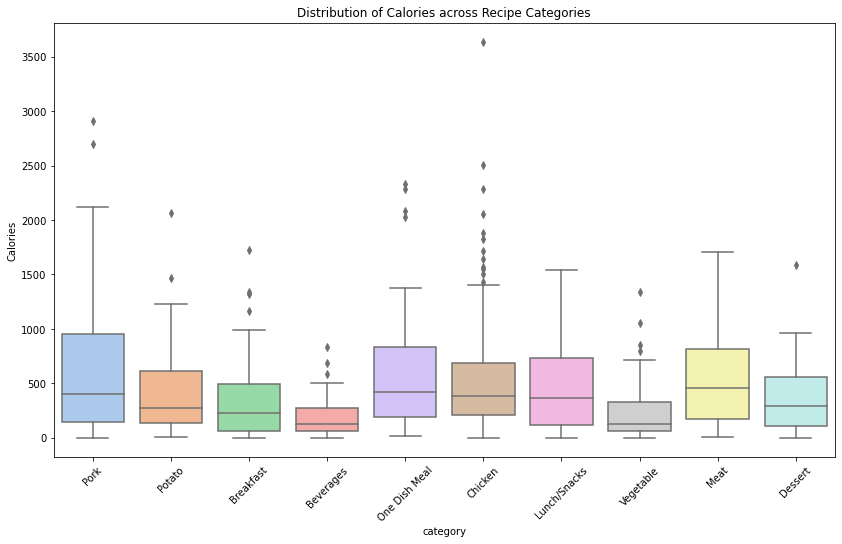

In [21]:
# Box plot for 'calories' across different 'categories'
plt.figure(figsize=(14, 8))
sns.boxplot(x=df['category'], y=df['calories'], palette="pastel")
plt.title('Distribution of Calories across Recipe Categories')
plt.xlabel('category')
plt.ylabel('Calories')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:title={'center':'Count plot category by traffic'}, xlabel='category', ylabel='count'>

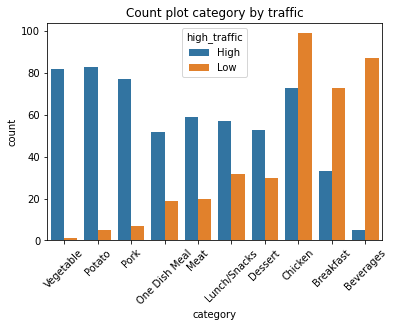

In [22]:
# get countplot to check relationship between high traffic and category
plt.title('Count plot category by traffic')
plt.figsize=(15,15)
plt.xticks(rotation=45)
sns.countplot(x=df['category'].sort_values(ascending=False), hue =df['high_traffic'])

Box Plot for Calories across Categories:

The "Meat" category tends to have the highest median caloric content, with a broad interquartile range, indicating a wide variety of meat dishes in terms of their caloric content.
"Beverages" have the lowest median caloric content, which is expected since drinks typically have fewer calories than solid foods.
There's noticeable variation in caloric content within categories like "One Dish Meal", "Chicken", and "Dessert", as indicated by the widths of their boxes and the lengths of their whiskers.

#The servings column has been cleaned, and it now contains only the numerical values: 

<AxesSubplot:xlabel='servings', ylabel='count'>

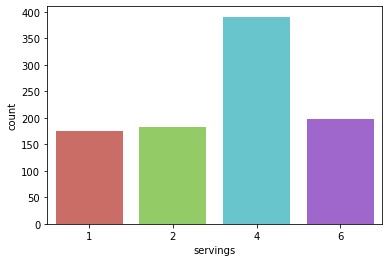

In [23]:
# servings plot
sns.countplot(x='servings', data=df, palette='hls')

<AxesSubplot:xlabel='servings'>

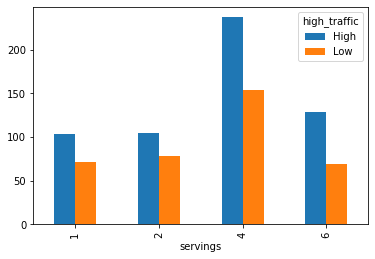

In [24]:
#bar chart of servings with high traffic
pd.crosstab(df.servings, df.high_traffic).plot(kind='bar')

In [25]:
# Impute the missing values in 'calories', 'carbohydrate', 'sugar', and 'protein' with their respective medians, median is used as the data is skewed
df['calories'].fillna(df['calories'].median(), inplace=True)
df['carbohydrate'].fillna(df['carbohydrate'].median(), inplace=True)
df['sugar'].fillna(df['sugar'].median(), inplace=True)
df['protein'].fillna(df['protein'].median(), inplace=True)

# Impute the missing values in 'high_traffic' with 'Low'
df['high_traffic'].fillna('Low', inplace=True)

# Check if all missing values are im


In [26]:
df['high_traffic'].fillna('Low', inplace=True)

# drop all other missing values
df.dropna(inplace=True)

In [27]:
# count healthy 
df[df['healthy']==1].value_counts(['high_traffic'])

high_traffic
High            141
Low              46
dtype: int64

In [28]:
# percentage healthy of total rows
df[df['healthy']==1].value_counts(['high_traffic'])/len(df)

high_traffic
High            0.148891
Low             0.048574
dtype: float64

In [29]:
#check for missing values
df.isnull().sum()

calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
healthy         0
difficulty      0
dtype: int64

In [30]:
df.columns

Index(['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings',
       'high_traffic', 'healthy', 'difficulty'],
      dtype='object')

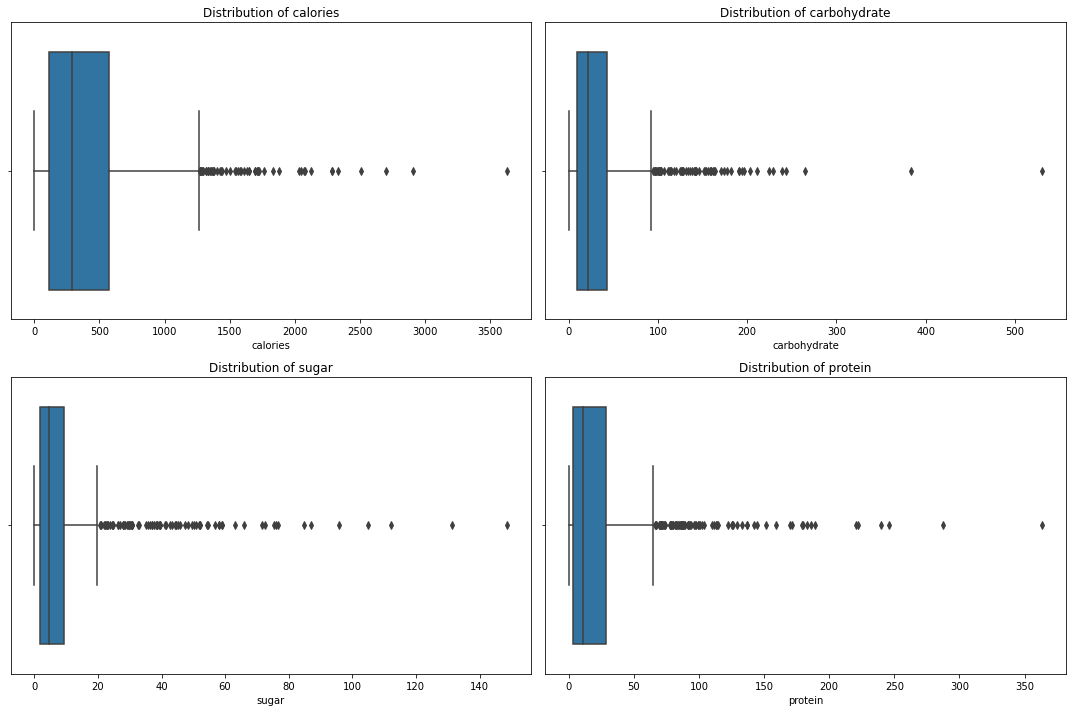

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to visualize for potential outliers
columns_to_check = ['calories', 'carbohydrate', 'sugar', 'protein']

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

The boxplots clearly indicate the presence of outliers in the columns calories, carbohydrate, sugar, and protein. These outliers could potentially be the cause of the error when trying to standardize the data.

To handle these outliers, we can employ one of the following strategies:

Capping: Replace outlier values with the boundary values (either the 1st or 3rd quartile values depending on whether it's a lower or upper outlier).
Transformation: Apply transformations like log transformation to reduce the effect of outliers.
Removal: Remove records with outlier values.
Given the importance of not losing data, especially in this context where we are trying to predict high traffic recipes, I recommend using the capping method. This method will ensure we retain all records while minimizing the influence of extreme values.



In [32]:
df.shape

(947, 9)

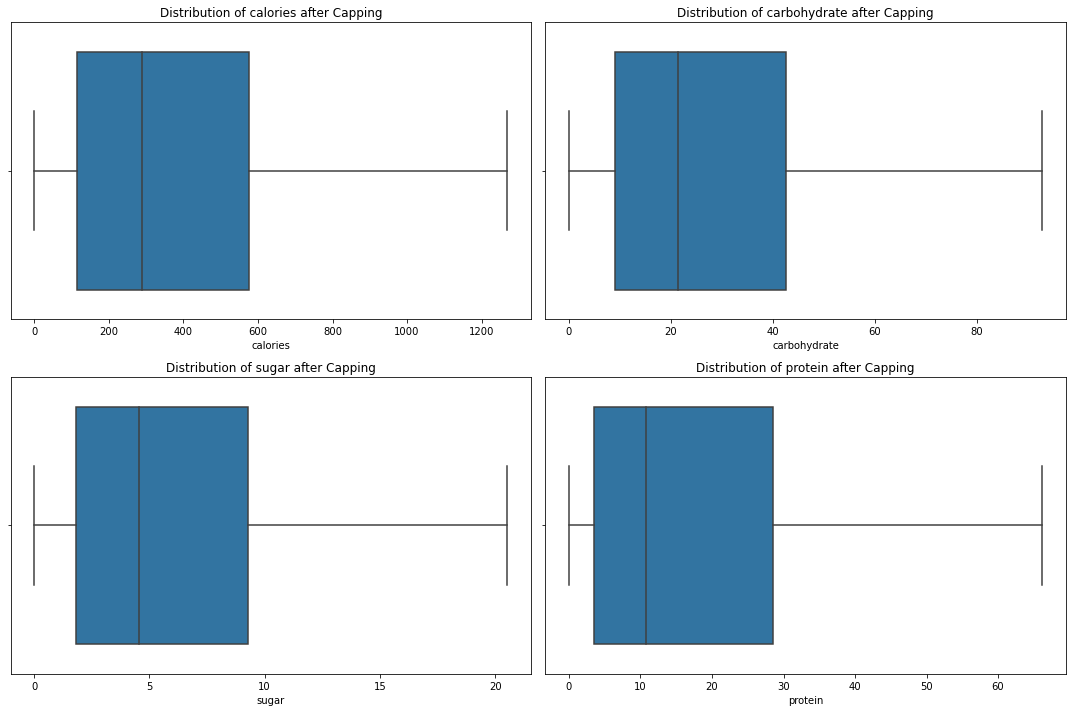

In [33]:
# Capping outliers based on the IQR method
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with boundary values
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Visualize the distributions after capping
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col} after Capping')

plt.tight_layout()
plt.show()


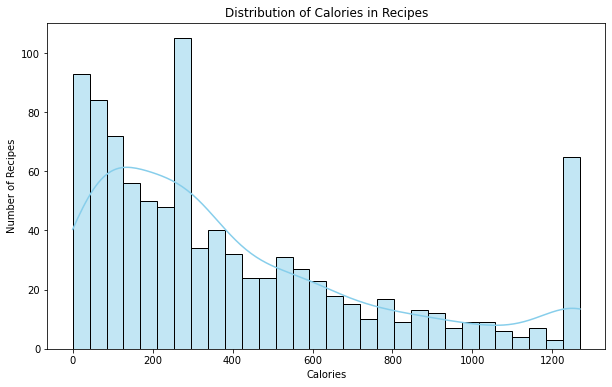

In [34]:
#show histogram of calories
plt.figure(figsize=(10, 6))
sns.histplot(df['calories'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Calories in Recipes')
plt.xlabel('Calories')
plt.ylabel('Number of Recipes')
plt.show()

In [35]:
import numpy as np
import sklearn

print("Numpy version:", np.__version__)
print("Sklearn version:", sklearn.__version__)


Numpy version: 1.21.6
Sklearn version: 0.24.2


In [36]:
#Import the PowerTransformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df[['pt_calories', 'pt_carbohydrate', 'pt_sugar', 'pt_protein']] = pt.fit_transform(df[['calories', 'carbohydrate', 'sugar', 'protein']])


# log transformation of 'calories', 'sugar','carbohydrate','protein'
df['log_calories'] = np.log(df['calories'])# remove
df['log_sugar'] = np.log(df['sugar']) # remove
df['log_carbohydrates'] = np.log(df['carbohydrate'])
df['log_protein'] = np.log1p(df['protein'])


In [37]:
# test for normality
from scipy.stats import shapiro

# Testing for normality 'log_calories', 'log_sugar'
columns_to_test = ['pt_calories', 'pt_carbohydrate', 'pt_sugar', 'pt_protein']

for column in columns_to_test:
    stat, p = shapiro(df[column])
    print(f"Shapiro-Wilk Test for {column}:")
    print(f"Statistic = {stat:.5f}, p-value = {p:.5f}")
    if p > 0.05:
        print(f"{column} looks Gaussian (fail to reject H0)\n")
    else:
        print(f"{column} does not look Gaussian (reject H0)\n")

Shapiro-Wilk Test for pt_calories:
Statistic = 0.98211, p-value = 0.00000
pt_calories does not look Gaussian (reject H0)

Shapiro-Wilk Test for pt_carbohydrate:
Statistic = 0.97679, p-value = 0.00000
pt_carbohydrate does not look Gaussian (reject H0)

Shapiro-Wilk Test for pt_sugar:
Statistic = 0.96631, p-value = 0.00000
pt_sugar does not look Gaussian (reject H0)

Shapiro-Wilk Test for pt_protein:
Statistic = 0.95953, p-value = 0.00000
pt_protein does not look Gaussian (reject H0)



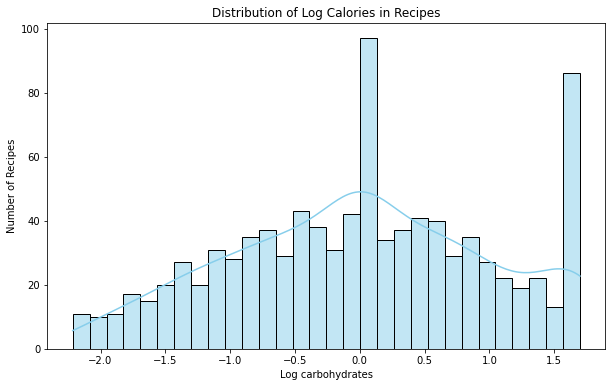

In [38]:
# Histogram for 'log_calories'
plt.figure(figsize=(10, 6))
sns.histplot(df['pt_carbohydrate'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Log Calories in Recipes')
plt.xlabel('Log carbohydrates')
plt.ylabel('Number of Recipes')
plt.show()

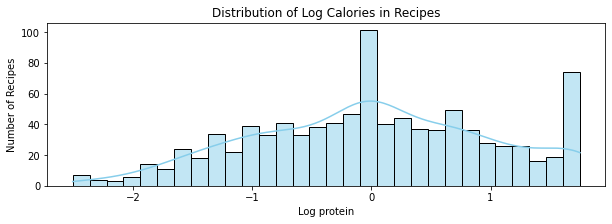

In [39]:
# Histogram for 'log_calories'
plt.figure(figsize=(10, 3))
sns.histplot(df['pt_calories'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Log Calories in Recipes')
plt.xlabel('Log protein')
plt.ylabel('Number of Recipes')
plt.show()

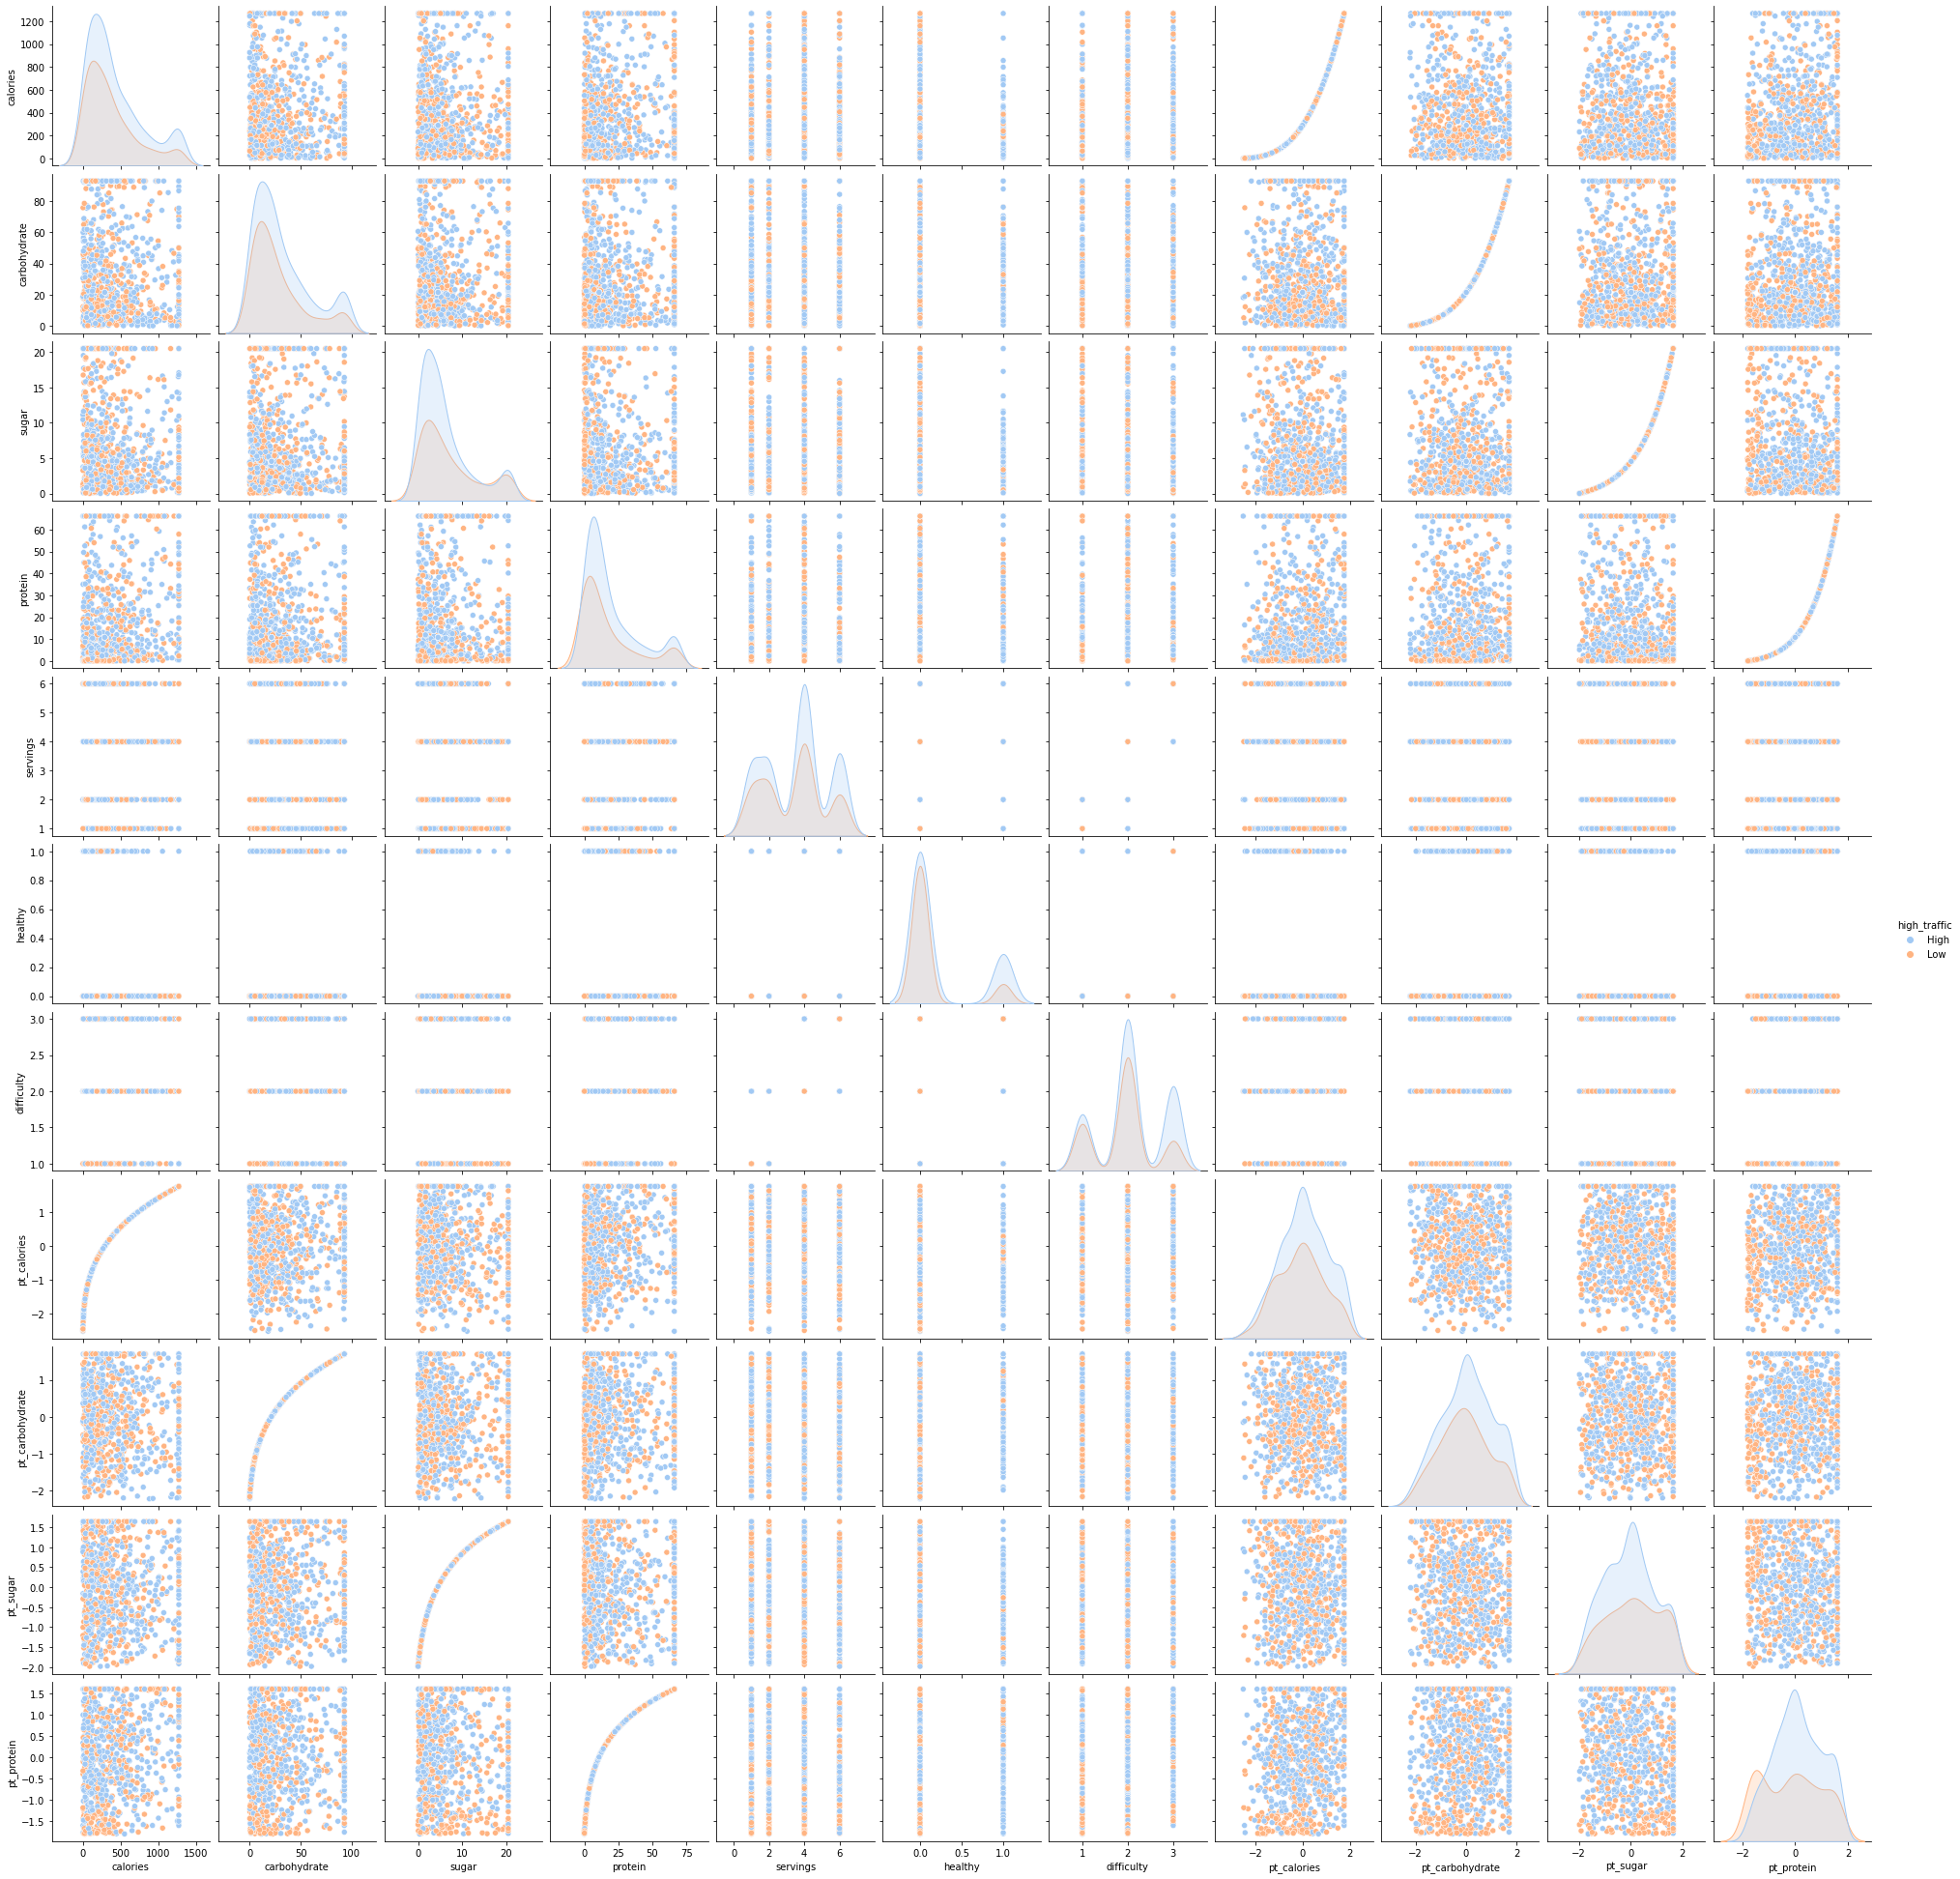

In [40]:
#searborn pairplot
sns.pairplot(df, hue = 'high_traffic', palette="pastel")
plt.show()

In [41]:
df.columns

Index(['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings',
       'high_traffic', 'healthy', 'difficulty', 'pt_calories',
       'pt_carbohydrate', 'pt_sugar', 'pt_protein'],
      dtype='object')

In [42]:
# use statistcal test t-test to compare means of high traffic and low traffic in calories, carbohydrates, sugar, and protein
from scipy.stats import ttest_ind

# t-test for 'calories'
high_traffic_calories = df[df['high_traffic'] == 'High']['pt_calories']
low_traffic_calories = df[df['high_traffic'] == 'Low']['pt_calories']

ttest_ind(high_traffic_calories, low_traffic_calories)

# t-test for 'carbohydrate'
high_traffic_carbohydrate = df[df['high_traffic'] == 'High']['pt_carbohydrate']
low_traffic_carbohydrate = df[df['high_traffic'] == 'Low']['pt_carbohydrate']

ttest_ind(high_traffic_carbohydrate, low_traffic_carbohydrate)

# t-test for 'sugar'
high_traffic_sugar = df[df['high_traffic'] == 'High']['pt_sugar']
low_traffic_sugar = df[df['high_traffic'] == 'Low']['pt_sugar']

ttest_ind(high_traffic_sugar, low_traffic_sugar)

# t-test for 'protein'
high_traffic_protein = df[df['high_traffic'] == 'High']['pt_protein']
low_traffic_protein = df[df['high_traffic'] == 'Low']['pt_protein']

ttest_ind(high_traffic_protein, low_traffic_protein)

# print t-statistic and p-value for each variable
print('Calories: ', ttest_ind(high_traffic_calories, low_traffic_calories))
print('Carbohydrate: ', ttest_ind(high_traffic_carbohydrate, low_traffic_carbohydrate))
print('Sugar: ', ttest_ind(high_traffic_sugar, low_traffic_sugar))
print('Protein: ', ttest_ind(high_traffic_protein, low_traffic_protein))

Calories:  Ttest_indResult(statistic=2.0541995329156375, pvalue=0.04023099314711376)
Carbohydrate:  Ttest_indResult(statistic=1.8262981052884302, pvalue=0.0681207552159238)
Sugar:  Ttest_indResult(statistic=-2.100555484409667, pvalue=0.03594447777576452)
Protein:  Ttest_indResult(statistic=3.778427760646781, pvalue=0.00016770038234075908)


In [43]:
from scipy.stats import chi2_contingency,ttest_ind

contingency_table = pd.crosstab(df['category'], df['high_traffic'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2, p

(318.2935223075692, 3.417304408371102e-63)

the chi-squared statistic is 300.1309861002327, and the p-value below 0.05  means that we can reject the null hypothesis and conclude that there is a significant association between the category of the recipe and the level of traffic to the website when the recipe was shown.

as you will see in the following plot that shows the number of recipes that belong to each category and whether they have high traffic or not. From this plot, we can conclude that there is a strong association between the category and high_traffic variables

In [44]:
contingency_table = pd.crosstab(df['servings'], df['high_traffic'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2, p

(2.7369889309788054, 0.4339779666711946)

From the following plot and the p-value there is not significant association between the servings and the high traffic data

Model Fitting & Evaluation
It's clear that this is a classification problem. The target variable, high_traffic, is binary, indicating whether a recipe will lead to high traffic or not.

For the evaluation, I chose  Accuracy: This measures the proportion of correct predictions in the total predictions made. Given the goal of predicting high traffic recipes correctly 80% of the time, accuracy will be a primary metric of interest.

Approximately 59.78% of the recipes do not lead to high traffic (Class 0).

Approximately 40.22% of the recipes lead to high traffic (Class 1).

While there is a slight imbalance, it's not extremely skewed. However, even this degree of imbalance can sometimes lead to biased model predictions, especially if the model ends up favoring the majority class.

In [45]:
df

calories  carbohydrate  sugar  protein      category  servings  \
recipe                                                                   
1         288.55         21.48   4.55    10.80          Pork         6   
2          35.48         38.56   0.66     0.92        Potato         4   
3         914.28         42.68   3.09     2.88     Breakfast         1   
4          97.03         30.56  20.52     0.02     Beverages         4   
5          27.05          1.85   0.80     0.53     Beverages         4   
...          ...           ...    ...      ...           ...       ...   
943      1161.00          5.31  20.52    44.22  Lunch/Snacks         2   
944       288.55         21.48   4.55    10.80        Potato         2   
945       951.74         29.42   3.57    13.87          Pork         2   
946       266.61         35.77   0.97     8.07        Potato         6   
947       184.56         45.21   6.20     0.03     Beverages         4   

       high_traffic  healthy  difficulty  pt_calories  pt_carbohydrate  \
recipe                                                                   
1              High        0           3    -0.003243         0.009159   
2              High        0           2    -1.443906         0.613120   
3               Low        0           1     1.291509         0.727170   
4              High        0           2    -0.868755         0.362397   
5               Low        0           2    -1.569741        -1.643838   
...             ...      ...         ...          ...              ...   
943             Low        0           2     1.621900        -1.097059   
944            High        0           1    -0.003243         0.009159   
945            High        0           2     1.345365         0.322769   
946            High        0           2    -0.076326         0.530551   
947             Low        0           2    -0.393759         0.793137   

        pt_sugar  pt_protein  
recipe                        
1       0.021311   -0.001768  
2      -1.402296   -1.379026  
3      -0.340626   -0.877516  
4       1.643819   -1.798229  
5      -1.307421   -1.532845  
...          ...         ...  
943     1.643819    1.207910  
944     0.021311   -0.001768  
945    -0.209201    0.194031  
946    -1.201570   -0.218636  
947     0.330948   -1.791980  

[947 rows x 13 columns]

In [46]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures


In [47]:
df

calories  carbohydrate  sugar  protein      category  servings  \
recipe                                                                   
1         288.55         21.48   4.55    10.80          Pork         6   
2          35.48         38.56   0.66     0.92        Potato         4   
3         914.28         42.68   3.09     2.88     Breakfast         1   
4          97.03         30.56  20.52     0.02     Beverages         4   
5          27.05          1.85   0.80     0.53     Beverages         4   
...          ...           ...    ...      ...           ...       ...   
943      1161.00          5.31  20.52    44.22  Lunch/Snacks         2   
944       288.55         21.48   4.55    10.80        Potato         2   
945       951.74         29.42   3.57    13.87          Pork         2   
946       266.61         35.77   0.97     8.07        Potato         6   
947       184.56         45.21   6.20     0.03     Beverages         4   

       high_traffic  healthy  difficulty  pt_calories  pt_carbohydrate  \
recipe                                                                   
1              High        0           3    -0.003243         0.009159   
2              High        0           2    -1.443906         0.613120   
3               Low        0           1     1.291509         0.727170   
4              High        0           2    -0.868755         0.362397   
5               Low        0           2    -1.569741        -1.643838   
...             ...      ...         ...          ...              ...   
943             Low        0           2     1.621900        -1.097059   
944            High        0           1    -0.003243         0.009159   
945            High        0           2     1.345365         0.322769   
946            High        0           2    -0.076326         0.530551   
947             Low        0           2    -0.393759         0.793137   

        pt_sugar  pt_protein  
recipe                        
1       0.021311   -0.001768  
2      -1.402296   -1.379026  
3      -0.340626   -0.877516  
4       1.643819   -1.798229  
5      -1.307421   -1.532845  
...          ...         ...  
943     1.643819    1.207910  
944     0.021311   -0.001768  
945    -0.209201    0.194031  
946    -1.201570   -0.218636  
947     0.330948   -1.791980  

[947 rows x 13 columns]

In [48]:
# convert with one hot encoding category,servings, high_traffic, use 0 and 1
df = pd.get_dummies(df, columns=['category', 'high_traffic'], drop_first=False)
df.head()

calories  carbohydrate  sugar  protein  servings  healthy  difficulty  \
recipe                                                                          
1         288.55         21.48   4.55    10.80         6        0           3   
2          35.48         38.56   0.66     0.92         4        0           2   
3         914.28         42.68   3.09     2.88         1        0           1   
4          97.03         30.56  20.52     0.02         4        0           2   
5          27.05          1.85   0.80     0.53         4        0           2   

        pt_calories  pt_carbohydrate  pt_sugar  ...  category_Chicken  \
recipe                                          ...                     
1         -0.003243         0.009159  0.021311  ...                 0   
2         -1.443906         0.613120 -1.402296  ...                 0   
3          1.291509         0.727170 -0.340626  ...                 0   
4         -0.868755         0.362397  1.643819  ...                 0   
5         -1.569741        -1.643838 -1.307421  ...                 0   

        category_Dessert  category_Lunch/Snacks  category_Meat  \
recipe                                                           
1                      0                      0              0   
2                      0                      0              0   
3                      0                      0              0   
4                      0                      0              0   
5                      0                      0              0   

        category_One Dish Meal  category_Pork  category_Potato  \
recipe                                                           
1                            0              1                0   
2                            0              0                1   
3                            0              0                0   
4                            0              0                0   
5                            0              0                0   

        category_Vegetable  high_traffic_High  high_traffic_Low  
recipe                                                           
1                        0                  1                 0  
2                        0                  1                 0  
3                        0                  0                 1  
4                        0                  1                 0  
5                        0                  0                 1  

[5 rows x 23 columns]

In [49]:
# replace False with 0 and True with 1 on all columns
df = df.replace(False, 0)
df = df.replace(True, 1)

In [50]:
#rename high_traffic_Low to high_traffic
df.rename(columns={'high_traffic_Low': 'high_traffic'}, inplace=True)

In [51]:
df.head()

calories  carbohydrate  sugar  protein  servings  healthy  difficulty  \
recipe                                                                          
1         288.55         21.48   4.55    10.80         6        0           3   
2          35.48         38.56   0.66     0.92         4        0           2   
3         914.28         42.68   3.09     2.88         1        0           1   
4          97.03         30.56  20.52     0.02         4        0           2   
5          27.05          1.85   0.80     0.53         4        0           2   

        pt_calories  pt_carbohydrate  pt_sugar  ...  category_Chicken  \
recipe                                          ...                     
1         -0.003243         0.009159  0.021311  ...                 0   
2         -1.443906         0.613120 -1.402296  ...                 0   
3          1.291509         0.727170 -0.340626  ...                 0   
4         -0.868755         0.362397  1.643819  ...                 0   
5         -1.569741        -1.643838 -1.307421  ...                 0   

        category_Dessert  category_Lunch/Snacks  category_Meat  \
recipe                                                           
1                      0                      0              0   
2                      0                      0              0   
3                      0                      0              0   
4                      0                      0              0   
5                      0                      0              0   

        category_One Dish Meal  category_Pork  category_Potato  \
recipe                                                           
1                            0              1                0   
2                            0              0                1   
3                            0              0                0   
4                            0              0                0   
5                            0              0                0   

        category_Vegetable  high_traffic_High  high_traffic  
recipe                                                       
1                        0                  1             0  
2                        0                  1             0  
3                        0                  0             1  
4                        0                  1             0  
5                        0                  0             1  

[5 rows x 23 columns]

In [52]:
#drop high_traffic_High
df.drop(columns=['high_traffic_High'], inplace=True)

In [53]:
#check for missing values
df.isnull().sum()

calories                  0
carbohydrate              0
sugar                     0
protein                   0
servings                  0
healthy                   0
difficulty                0
pt_calories               0
pt_carbohydrate           0
pt_sugar                  0
pt_protein                0
category_Beverages        0
category_Breakfast        0
category_Chicken          0
category_Dessert          0
category_Lunch/Snacks     0
category_Meat             0
category_One Dish Meal    0
category_Pork             0
category_Potato           0
category_Vegetable        0
high_traffic              0
dtype: int64

In [54]:
# drop calroies, sugar, carbohydrate, protein
#df.drop(['calories', 'sugar', 'carbohydrate', 'protein'], axis=1, inplace=True)

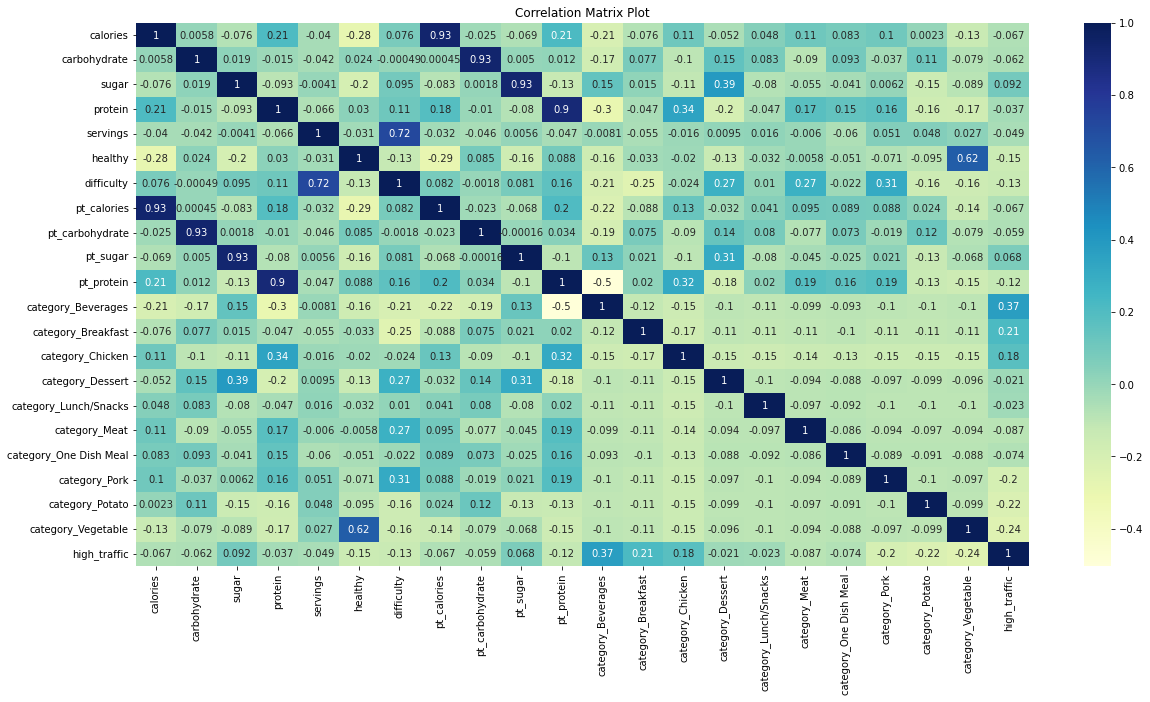

In [55]:
# show correlation matrix plot of all variables
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix Plot")
plt.show()


In [56]:
# aboslute high correlation  values with 'high_traffic' above abs values 0.001
high_corr = df.corr()['high_traffic'].abs().sort_values(ascending=False)
high_corr = high_corr[high_corr > 0.001]
high_corr




high_traffic              1.000000
category_Beverages        0.370437
category_Vegetable        0.242208
category_Potato           0.220794
category_Breakfast        0.214204
category_Pork             0.198287
category_Chicken          0.175195
healthy                   0.150135
difficulty                0.134022
pt_protein                0.121994
sugar                     0.092399
category_Meat             0.086880
category_One Dish Meal    0.073573
pt_sugar                  0.068172
calories                  0.066761
pt_calories               0.066674
carbohydrate              0.062259
pt_carbohydrate           0.059305
servings                  0.048708
protein                   0.036630
category_Lunch/Snacks     0.022626
category_Dessert          0.020571
Name: high_traffic, dtype: float64

In [57]:
# find the most important features relative to target with SelectKBest

X = df.drop('high_traffic', axis=1)
y = df['high_traffic']


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


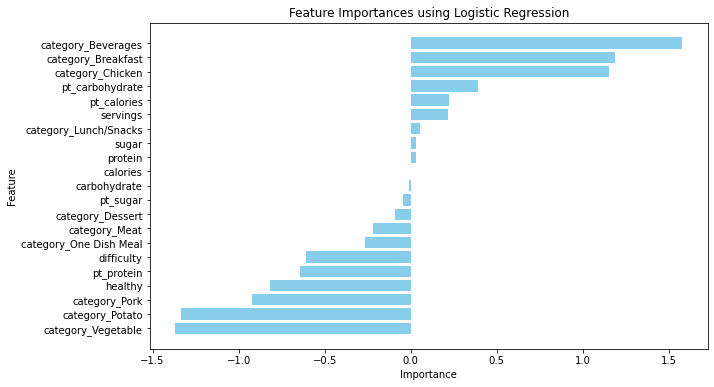

In [58]:
# Feature importance with logistic classifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Initialize the logistic regression
logreg = LogisticRegression()

# Fit the model
logreg.fit(X, y)

# Get the feature importances
feature_importances = logreg.coef_[0]

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances using Logistic Regression')
plt.gca().invert_yaxis()  # Highest importances at the top
plt.show()


In [59]:
# rank all features in a table in absolute order of importance from the previous model
features_df['Importance'] = abs(features_df['Importance'])
features_df = features_df.sort_values(by='Importance', ascending=False)
features_df

Feature  Importance
11      category_Beverages    1.577402
20      category_Vegetable    1.369015
19         category_Potato    1.332726
12      category_Breakfast    1.189060
13        category_Chicken    1.153320
18           category_Pork    0.919930
5                  healthy    0.819415
10              pt_protein    0.640918
6               difficulty    0.609313
8          pt_carbohydrate    0.392957
17  category_One Dish Meal    0.267239
7              pt_calories    0.224342
16           category_Meat    0.216553
4                 servings    0.214090
14        category_Dessert    0.089473
15   category_Lunch/Snacks    0.054363
9                 pt_sugar    0.045481
2                    sugar    0.031256
3                  protein    0.027641
1             carbohydrate    0.010996
0                 calories    0.000701

In [60]:
# Drop  log_protein, log_carbohydrates, sugar, log_calories,  'carbohydrate', 'sugar'
df.drop([ 'protein','carbohydrate','sugar','calories'], axis=1, inplace=True)

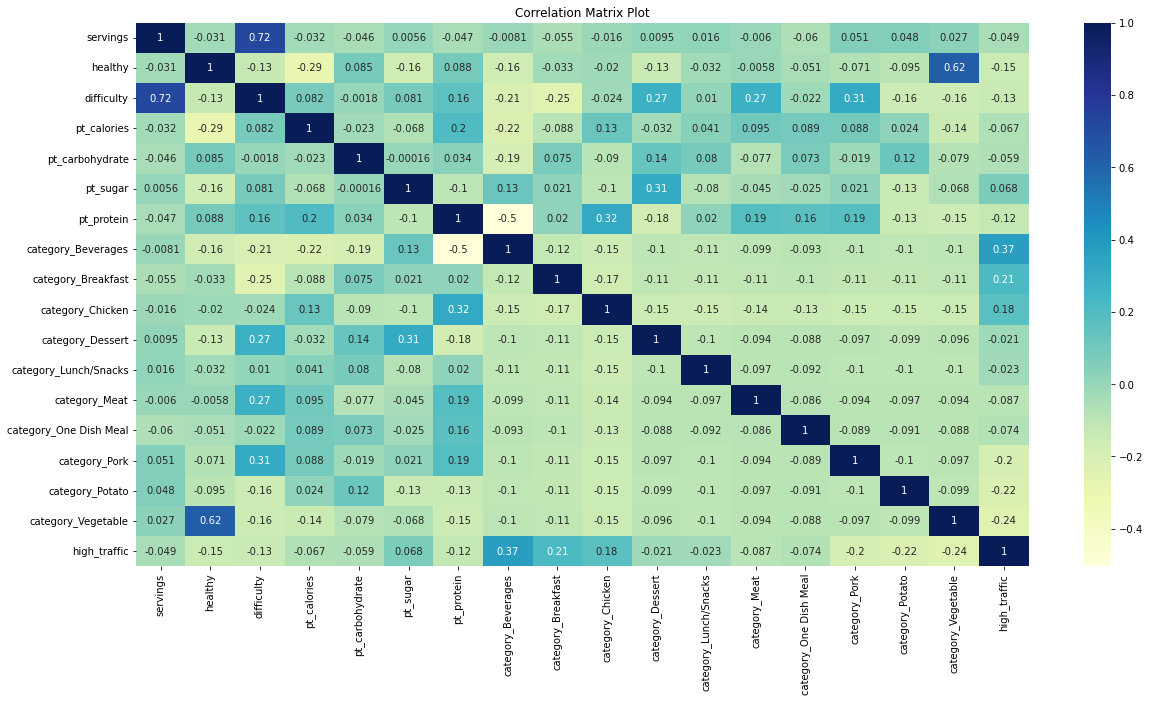

In [61]:
# show correlation matrix plot of all variables
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix Plot")
plt.show()

In [62]:
#Use sharply to see the best features


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1 to 947
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   servings                947 non-null    int64  
 1   healthy                 947 non-null    int64  
 2   difficulty              947 non-null    int64  
 3   pt_calories             947 non-null    float64
 4   pt_carbohydrate         947 non-null    float64
 5   pt_sugar                947 non-null    float64
 6   pt_protein              947 non-null    float64
 7   category_Beverages      947 non-null    uint8  
 8   category_Breakfast      947 non-null    uint8  
 9   category_Chicken        947 non-null    uint8  
 10  category_Dessert        947 non-null    uint8  
 11  category_Lunch/Snacks   947 non-null    uint8  
 12  category_Meat           947 non-null    uint8  
 13  category_One Dish Meal  947 non-null    uint8  
 14  category_Pork           947 non-null    ui

In [64]:
#remove servings_2,servings_4,servings_6
#df.drop(['servings_6'], axis=1, inplace=True)

# Model Fitting and Evaluation 

Predicting whether a recipe will lead to high traffic is a binary classification problem in machine learning. Given the nature of our dataset and the need for interpretability, I am choosing the Logistic Regression model. Logistic Regression is suitable for binary outcomes and provides probabilities that can be interpreted and calibrated. The model also works well when there's a linear decision boundary between classes.

As a comparison model, I'm selecting the Random Forest classifier. Random Forest is an ensemble method that can capture complex relationships in the data without needing explicit feature engineering. It's robust to outliers and can handle imbalanced datasets by adjusting class weights or through bootstrapping.

For evaluation, given the class imbalance and the nature of our problem, I'm prioritizing the F1-Score and ROC-AUC. The F1-Score provides a balance between precision and recall, making it a more comprehensive metric than accuracy for imbalanced datasets. ROC-AUC, on the other hand, gives us insights into the model's capability to distinguish between recipes that lead to high traffic and those that don't. Additionally, we'll also monitor Accuracy, Precision, and Recall to ensure our model's predictions are both precise and comprehensive.

This text is adapted to describe the problem at hand, the chosen models, and the rationale behind the model choices and evaluation metrics.

# Prepare Data for Modelling 
To facilitate the prediction of whether a recipe will lead to high traffic, we selected features like calories, sugar, carbohydrates, and protein among others, with high_traffic as the target variable. To further refine our dataset for modeling, the following transformations were applied:

Standardization of Numeric Features: Given the varied scales of our numeric features, we standardized them to have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the model's performance.

Encoding Categorical Variables: Any categorical variables in our dataset were converted into numeric representations, ensuring our models can process them effectively.

Data Splitting: To evaluate our model's performance on unseen data, we split the dataset into a training set (to train the model) and a test set (to evaluate the model).



In [65]:
#import standard scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#import train test split
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X = df.drop('high_traffic', axis=1)
y = df['high_traffic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
# Get the value counts for each class
class_counts = y.value_counts()

# Calculate the percentage distribution of each class
class_percentage = (class_counts / len(y)) * 100
class_percentage

0    60.61246
1    39.38754
Name: high_traffic, dtype: float64

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Esemble model , measure F1 score, precious, recall, accuracy
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Initialize and fit the baseline model: Logistic Regression
logreg = LogisticRegression(class_weight='balanced',penalty='l2',C=0.001)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_baseline = logreg.predict(X_test)

# Evaluate the performance of the baseline model
accuracy_baseline = f1_score(y_test, y_pred_baseline)
accuracy_baseline

0.64

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Define the metrics
scoring_metrics = {
    'f1': 'f1',
    'f1_weighted': 'f1_weighted',
    'roc_auc': 'roc_auc',
    'neg_log_loss': 'neg_log_loss',
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'auc': 'roc_auc'
}

# Evaluate the model using cross-validation
scores = {}
for metric_name, metric in scoring_metrics.items():
    cv_score = cross_val_score(logreg, X_train, y_train, cv=5, scoring=metric)
    scores[metric_name] = cv_score.mean()

scores


{'f1': 0.6649224662122369,
 'f1_weighted': 0.7315879287427559,
 'roc_auc': 0.808116668010536,
 'neg_log_loss': -0.6871612430423821,
 'accuracy': 0.731203007518797,
 'precision': 0.6551065115701453,
 'recall': 0.6779390420899855,
 'auc': 0.808116668010536}

In [69]:
# check classifcation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_baseline))


              precision    recall  f1-score   support

           0       0.78      0.66      0.72       173
           1       0.58      0.71      0.64       112

    accuracy                           0.68       285
   macro avg       0.68      0.69      0.68       285
weighted avg       0.70      0.68      0.69       285



In [70]:
# build model 'LinearSVC' and measure F1 score, precious, recall, accuracy using cross validation
from sklearn.svm import LinearSVC

# Initialize and fit the model
lsvc = LinearSVC(class_weight='balanced')
lsvc.fit(X_train, y_train)

# Predict on the test set
y_pred_lsvc = lsvc.predict(X_test)

# Evaluate the performance of the model
accuracy_lsvc = f1_score(y_test, y_pred_lsvc)
accuracy_lsvc

# Evaluate the model using cross-validation
scores = {}
for metric_name, metric in scoring_metrics.items():
    cv_score = cross_val_score(lsvc, X_train, y_train, cv=5, scoring=metric)
    scores[metric_name] = cv_score.mean()

scores

# check classifcation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lsvc))



              precision    recall  f1-score   support

           0       0.84      0.56      0.67       173
           1       0.55      0.84      0.67       112

    accuracy                           0.67       285
   macro avg       0.70      0.70      0.67       285
weighted avg       0.73      0.67      0.67       285



/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 277, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'Linea

In [71]:
# bernoulli naive bayes classifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define model
model = BernoulliNB(alpha=0.255)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1: %.3f' % np.mean(scores))

#predict on test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# check classifcation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scip

Mean F1: 0.660
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       173
           1       0.66      0.63      0.65       112

    accuracy                           0.73       285
   macro avg       0.71      0.71      0.71       285
weighted avg       0.72      0.73      0.73       285



In [72]:
#SDG classifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define model
model = SGDClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1: %.3f' % np.mean(scores))

#predict on test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# check classifcation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Mean F1: 0.581
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       173
           1       0.78      0.46      0.58       112

    accuracy                           0.74       285
   macro avg       0.75      0.69      0.69       285
weighted avg       0.75      0.74      0.72       285



In [73]:
# Build a model with ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define model
model = ExtraTreesClassifier(n_estimators=250)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1: %.3f' % np.mean(scores))

#predict on test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# check classifcation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



Mean F1: 0.639
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       173
           1       0.65      0.63      0.64       112

    accuracy                           0.72       285
   macro avg       0.71      0.70      0.70       285
weighted avg       0.72      0.72      0.72       285



In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf=RandomForestClassifier()
param_grid = {'n_estimators': [10, 50, 100,150,200],
              'max_depth': [None, 5, 10]
              }
gs=GridSearchCV(rf,param_grid)
gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [10, 50, 100, 150, 200]})

In [75]:
# check best parameters
gs.best_params_

{'max_depth': 5, 'n_estimators': 150}

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

y_pred = gs.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("confussion matrix: ",conf_matrix)
print("accuarcy: ",acc)
print("precision: ", precision)
print("recall: ",recall)
print("f1: ",f1)

confussion matrix:  [[152  21]
 [ 52  60]]
accuarcy:  0.743859649122807
precision:  0.7407407407407407
recall:  0.5357142857142857
f1:  0.6217616580310881


In [77]:
# Build a model with GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define model
model = GradientBoostingClassifier(n_estimators=30, max_depth=4)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1: %.3f' % np.mean(scores))

#predict on test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# check classifcation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Mean F1: 0.664
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       173
           1       0.69      0.66      0.68       112

    accuracy                           0.75       285
   macro avg       0.74      0.73      0.74       285
weighted avg       0.75      0.75      0.75       285



In [78]:
#Build model with XGBClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define model
model = XGBClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1: %.3f' % np.mean(scores))

#predict on test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# check classifcation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Mean F1: 0.581
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       173
           1       0.58      0.62      0.60       112

    accuracy                           0.67       285
   macro avg       0.66      0.66      0.66       285
weighted avg       0.68      0.67      0.68       285



In [79]:
# Esemble model SGDClassifier and BernoulliNB, measure F1 score, precious, recall, accuracy
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define the base models
models = list()
models.append(('SGDClassifier', SGDClassifier()))
models.append(('LinearSVC', LinearSVC(class_weight='balanced')))
models.append(('BernoulliNB', BernoulliNB(alpha=0.255)))
models.append(('LogisticRegression', LogisticRegression(class_weight='balanced',penalty='l2',C=0.001)))
models.append(('GradientBoost', GradientBoostingClassifier(n_estimators=30, max_depth=4)))

# define the voting ensemble
ensemble = VotingClassifier(estimators=models, voting='hard')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate the ensemble
scores = cross_val_score(ensemble, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1: %.3f' % np.mean(scores))

#summarize AUC score
from sklearn.metrics import roc_auc_score
# evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = roc_auc_score(y_test, y_pred)
    results.append(f1)
    names.append(name)
    print('%s: %f' % (name, f1))


#predict on test set
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)  # Corrected this line

# check classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-pac

Mean F1: 0.670
SGDClassifier: 0.700248
LinearSVC: 0.699990
BernoulliNB: 0.710028
LogisticRegression: 0.689513
GradientBoost: 0.727627
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       173
           1       0.62      0.62      0.62       112

    accuracy                           0.71       285
   macro avg       0.69      0.69      0.69       285
weighted avg       0.71      0.71      0.71       285



In [80]:
pip install h2o

Note: you may need to restart the kernel to use updated packages.


In [81]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()
h2o_df = h2o.H2OFrame(df)
# Convert the 'high_traffic' column to a factor (categorical variable)
h2o_df['high_traffic'] = h2o_df['high_traffic'].asfactor()

# Now, split the H2OFrame
train, test = h2o_df.split_frame(ratios=[0.8], seed=1)

# Continue with the rest of your code
aml = H2OAutoML(max_models=30, balance_classes=True, seed=1,nfolds=30,project_name='classification',max_runtime_secs_per_model=1000 )
aml.train(training_frame=train, y='high_traffic')
lb = aml.leaderboard
lb.head(rows=10)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_371"; Java(TM) SE Runtime Environment (build 1.8.0_371-b11); Java HotSpot(TM) 64-Bit Server VM (build 25.371-b11, mixed mode)
  Starting server from /Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/ks/5bc1x9p158vgc4774v7r2tq40000gn/T/tmp94ecuplc
  JVM stdout: /var/folders/ks/5bc1x9p158vgc4774v7r2tq40000gn/T/tmp94ecuplc/h2o_stephaniegessler_started_from_python.out
  JVM stderr: /var/folders/ks/5bc1x9p158vgc4774v7r2tq40000gn/T/tmp94ecuplc/h2o_stephaniegessler_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ---------------------------------------
H2O_cluster_uptime:         13 secs
H2O_cluster_timezone:       Europe/Zurich
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.1
H2O_cluster_version_age:    3 days
H2O_cluster_name:           H2O_from_python_stephaniegessler_n1ak0j
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.542 Gb
H2O_cluster_total_cores:    0
H2O_cluster_allowed_cores:  0
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.12 final
--------------------------  ---------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------
StackedEnsemble_AllModels_1_AutoML_1_20231019_180808     0.852436   0.458101  0.792163                0.230322  0.391218  0.153051
StackedEnsemble_BestOfFamily_1_AutoML_1_20231019_180808  0.839657   0.474357  0.772432                0.234375  0.399536  0.159629
DeepLearning_grid_2_AutoML_1_20231019_180808_model_2     0.836084   0.48052   0.769107                0.24348   0.402565  0.162058
DeepLearning_grid_2_AutoML_1_20231019_180808_model_1     0.835567   0.542035  0.774584                0.257871  0.413163  0.170703
DeepLearning_grid_1_AutoML_1_20231019_180808_model_1     0.832938   0.551842  0.761278                0.255757  0.416932  0.173832
DeepLearning_grid_1_AutoML_1_20231019_180808_model_2     0.83061    0.521288  0.76422                 0.25746   0.411397  0.169248
DeepLearning_grid_3_AutoML_1_20231019_180808_model_2     0.824538   0.495966  0.768041                0.25188   0.409944  0.168054
GBM_grid_1_AutoML_1_20231019_180808_model_4              0.816322   0.510375  0.749524                0.272615  0.412871  0.170462
DeepLearning_1_AutoML_1_20231019_180808                  0.813612   0.52804   0.728605                0.265449  0.41801   0.174733
GBM_grid_1_AutoML_1_20231019_180808_model_3              0.807496   0.517662  0.738619                0.27238   0.417084  0.173959
[10 rows x 7 columns]

Stacked Ensembles
Ensemble machine learning methods use multiple learning algorithms to obtain better predictive performance than the ones that could be obtained from any of the constituent learning algorithms. Many of the popular modern machine learning algorithms are actually ensembles. For example, Random Forest and Gradient Boosting Machine (GBM) are both ensemble learners. Both bagging (e.g., Random Forest) and boosting (e.g., GBM) are methods for ensembling that take a collection of weak learners (e.g., decision tree) and form a single, strong learner.

H2O's Stacked Ensemble method is a supervised ensemble machine learning algorithm that finds the optimal combination of a collection of prediction algorithms using a process called stacking. Like all supervised models in H2O, Stacked Ensemble supports regression, binary classification, and multiclass classification. If you would like to know more, make sure to check the Stacked Ensemble Section in the H2O-3 Documentation.

In [82]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20231019_180808


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       6/30
# GBM base models (used / total)           1/10
# XGBoost base models (used / total)       0/10
# DeepLearning base models (used / total)  5/7
# GLM base models (used / total)           0/1
# DRF base models (used / total)           0/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         30
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.08519776241694878
RMSE: 0.29188655744475245
LogLoss: 0.2969415124306897
AUC: 0.98019340

By looking at the leaderboard, we can see that the best model is the Stacked Ensemble with the best model from each family, meaning that this model was built using the best model of each of the trained algorithms. This Ensemble will usually have a GLM, a Distributed Random Forest, Extremely-Randomized Forest, a GBM, and XGBoost, and Deep Learning model if you give it enough time to train all those models. Let's explore the coefficients of the metalearner to see the models in the Stacked Ensemble with their relative importance.

In [83]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

# Get the "All Models","StackedEnsemble_BestOfFamily"  Stacked Ensemble model or 
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_BestOfFamily" in mid][0])

# Get the Stacked Ensemble metalearner model
#metalearner = h2o.get_model(se.metalearner()['name'])
#metalearner.coef()

# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:, 0])

# Find the Stacked Ensemble model (if it exists)
se_model_ids = [mid for mid in model_ids if "StackedEnsemble_BestOfFamily" in mid]
if se_model_ids:
    se = h2o.get_model(se_model_ids[0])

    # Get the Stacked Ensemble metalearner model
    metalearner = h2o.get_model(se.metalearner()['name'])
    metalearner.coef()
else:
    print("No Stacked Ensemble model found in the leaderboard.")


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/h2o/estimators/stackedensemble.py:945: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


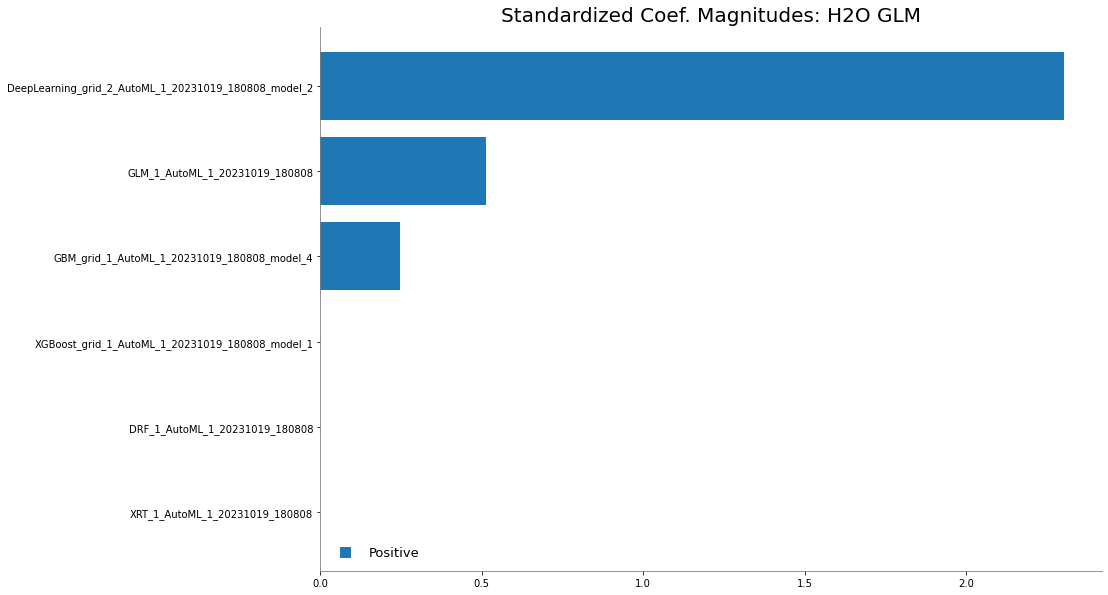

In [84]:
metalearner.std_coef_plot()


In [85]:
aml.leader

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20231019_180808


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       6/30
# GBM base models (used / total)           1/10
# XGBoost base models (used / total)       0/10
# DeepLearning base models (used / total)  5/7
# GLM base models (used / total)           0/1
# DRF base models (used / total)           0/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         30
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.08519776241694878
RMSE: 0.29188655744475245
LogLoss: 0.2969415124306897
AUC: 0.980193403430451
AUCPR: 0.9665113575731041
Gini: 0.960386806860902
Null degrees of freedom: 751
Residual degrees of freedom: 745
Null deviance: 1014.7478525217423
Residual deviance: 446.60003469575736
AIC: 460.60003469575736

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5222858846018483
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      421  27   0.0603   (27.0/448.0)
1      15   289  0.0493   (15.0/304.0)
Total  436  316  0.0559   (42.0/752.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.522286     0.932258  185
max f2                       0.499338     0.948387  194
max f0point5                 0.53588      0.933333  177
max accuracy                 0.525226     0.944149  184
max precision                0.981143     1         0
max recall                   0.130739     1         335
max specificity              0.981143     1         0
max absolute_mcc             0.522286     0.885257  185
max min_per_class_accuracy   0.525226     0.941964  184
max mean_per_class_accuracy  0.522286     0.945195  185
max tns                      0.981143     448       0
max fns                      0.981143     302       0
max fps                      2.85059e-06  448       399
max tps                      0.130739     304       335
max tnr                      0.981143     1         0
max fnr                      0.981143     0.993421  0
max fpr                      2.85059e-06  1         399
max tpr                      0.130739     1         335

Gains/Lift Table: Avg response rate: 40.43 %, avg score: 43.21 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0106383                   0.969036           2.47368    2.47368            1                0.976695     1                           0.976695            0.0263158       0.0263158                  147.368   147.368            0.0263158
2        0.0212766                   0.947655           2.47368    2.47368            1                0.95428      1                           0.965488            0.0263158       0.0526316                  147.368   147.368            0.0526316
3        0.0305851                   0.931564           2.47368    2.47368            1                0.939672     1                           0.957631            0.0230263       0.0756579                  147.368   147.368            0.0756579
4        0.0412234 

model_id                                              auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms  algo
-----------------------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------  -------
XGBoost_grid_1_AutoML_1_20231019_180808_model_4  0.753106   0.553142  0.640008                0.270531  0.431247  0.185974                 118                   0.021767  XGBoost
XGBoost_grid_1_AutoML_1_20231019_180808_model_3  0.745457   0.570878  0.607723                0.283126  0.438909  0.192641                 174                   0.025679  XGBoost
[2 rows x 10 columns]

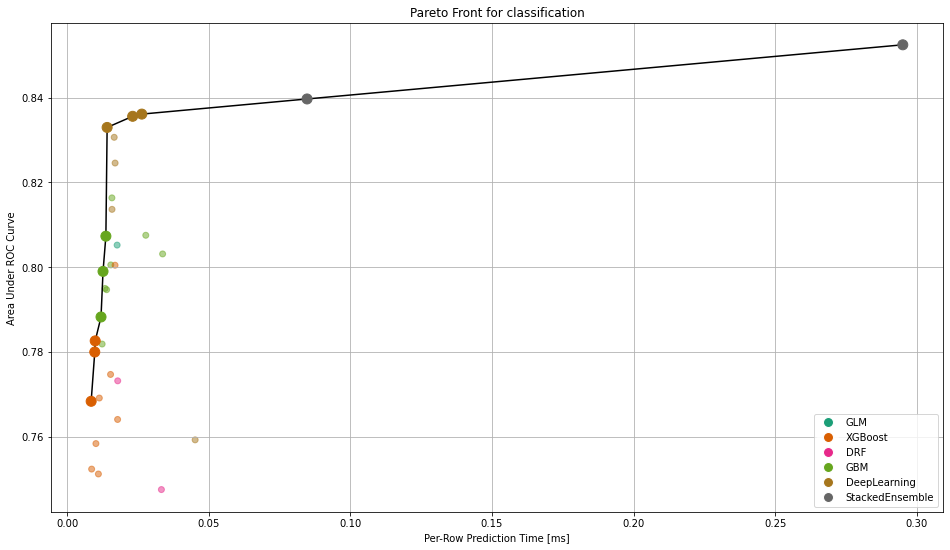

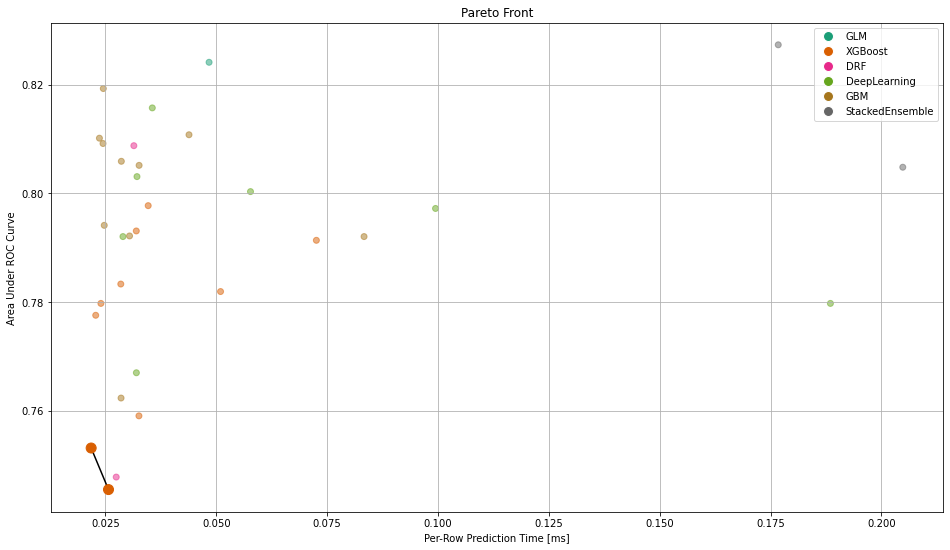

In [88]:
#show paretto front plot for automl aml
pf = aml.pareto_front()
pf.figure() # get the Pareto front plot
pf # H2OFrame containing the Pareto front subset of the leaderboard

combined_leaderboard = h2o.make_leaderboard([aml], test, extra_columns="ALL")
pf = h2o.explanation.pareto_front(combined_leaderboard, x_metric="predict_time_per_row_ms", y_metric="auc", optimum="bottom left")
pf.figure() # get the Pareto front plot
pf # H2OFrame containing the Pareto front subset of the leaderboard

In [90]:
# save best model
import os
save_dir = os.getcwd()
model_path = h2o.save_model(model=aml.leader, path=save_dir, force=True)

In [91]:
#load model
model = h2o.load_model('/Users/stephaniegessler/Documents/GitHub/recipe_site_traffic/StackedEnsemble_AllModels_1_AutoML_1_20231019_180808')

#show model performance
model.model_performance()
 
    
#show model performance on training data
model.model_performance(train=True)
 
 
#show model performance on test data
model.model_performance(valid=True)
 
 
#show model performance on cross validation data
model.model_performance(xval=True)

ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.15305133209340005
RMSE: 0.3912177553401686
LogLoss: 0.4581011087426502
AUC: 0.8524362664473684
AUCPR: 0.7921630471677872
Gini: 0.7048725328947367
Null degrees of freedom: 751
Residual degrees of freedom: 745
Null deviance: 1016.1086028385179
Residual deviance: 688.9840675489459
AIC: 702.9840675489459

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3634199573696045
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      305  143  0.3192   (143.0/448.0)
1      43   261  0.1414   (43.0/304.0)
Total  348  404  0.2473   (186.0/752.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.36342      0.737288  239
max f2                       0.186718     0.840961  313
max f0point5                 0.544658     0.734615  152
max accuracy                 0.482586     0.775266  182
max precision                0.988942     1         0
max recall                   0.0166634    1         385
max specificity              0.988942     1         0
max absolute_mcc             0.482586     0.532701  182
max min_per_class_accuracy   0.440462     0.761161  204
max mean_per_class_accuracy  0.386533     0.769972  227
max tns                      0.988942     448       0
max fns                      0.988942     303       0
max fps                      6.09969e-05  448       399
max tps                      0.0166634    304       385
max tnr                      0.988942     1         0
max fnr                      0.988942     0.996711  0
max fpr                      6.09969e-05  1         399
max tpr                      0.0166634    1         385

Gains/Lift Table: Avg response rate: 40.43 %, avg score: 40.46 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0106383                   0.979286           2.47368    2.47368            1                0.983145   1                           0.983145            0.0263158       0.0263158                  147.368   147.368            0.0263158
2        0.0212766                   0.967828           2.16447    2.31908            0.875            0.973262   0.9375                      0.978204            0.0230263       0.0493421                  116.447   131.908            0.04711
3        0.0305851                   0.961094           2.47368    2.36613            1                0.964792   0.956522                    0.974122            0.0230263       0.0723684                  147.368   136.613            0.0701363
4        0.0412234                   0.953564           2.16447    2.31409            0.875            0.957665   0.935484                    0.969875            0.0230263       0.0953947                  116.447   131.409            0.0909305
5        0.0505319                   0.947095           2.47368    2.34349            1                0.950844   0.947368                    0.966369            0.0230263       0.118421                   147.368   134.349            0.113957
6        0.101064                    0.863598           2.34349    2.34349            0.947368         0.919176   0.947368                    0.942772            0.118421        0.236842                   134.349   134.349            0.227914
7        0.150266                    0.741415           1.73826    2.14532            0.702703         0.800874   0.867257              

In [92]:
aml.leader.model_performance(test_data=test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.1783822463649587
RMSE: 0.42235322464136427
LogLoss: 0.6032786120658983
AUC: 0.8048079135035657
AUCPR: 0.6672194757214103
Gini: 0.6096158270071315
Null degrees of freedom: 194
Residual degrees of freedom: 188
Null deviance: 255.50944897780315
Residual deviance: 235.27865870536178
AIC: 249.27865870536178

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3931747695646975
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      84   42   0.3333   (42.0/126.0)
1      11   58   0.1594   (11.0/69.0)
Total  95   100  0.2718   (53.0/195.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.393175     0.686391  99
max f2                       0.266211     0.788177  129
max f0point5                 0.823695     0.66474   25
max accuracy                 0.823695     0.748718  25
max precision                0.823695     0.884615  25
max recall                   6.25916e-08  1         178
max specificity              0.932594     0.992063  0
max absolute_mcc             0.393175     0.485252  99
max min_per_class_accuracy   0.471889     0.722222  84
max mean_per_class_accuracy  0.393175     0.753623  99
max tns                      0.932594     125       0
max fns                      0.932594     69        0
max fps                      2.23975e-08  126       194
max tps                      6.25916e-08  69        178
max tnr                      0.932594     0.992063  0
max fnr                      0.932594     1         0
max fpr                      2.23975e-08  1         194
max tpr                      6.25916e-08  1         178

Gains/Lift Table: Avg response rate: 35.38 %, avg score: 41.59 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102564                   0.920406           1.41304   1.41304            0.5              0.931044     0.5                         0.931044            0.0144928       0.0144928                  41.3043   41.3043            0.00655625
2        0.0205128                   0.910522           2.82609   2.11957            1                0.916416     0.75                        0.92373             0.0289855       0.0434783                  182.609   111.957            0.0355418
3        0.0307692                   0.900288           1.41304   1.88406            0.5              0.909771     0.666667                    0.919077            0.0144928       0.057971                   41.3043   88.4058            0.042098
4        0.0410256                   0.89183            2.82609   2.11957            1                0.897839     0.75                        0.913767            0.0289855       0.0869565                  182.609   111.957            0.0710835
5        0.0512821                   0.874613           2.82609   2.26087            1                0.884421     0.8                         0.907898            0.0289855       0.115942                   182.609   126.087            0.100069
6        0.102564                    0.83725            2.54348   2.40217            0.9              0.856583     0.85                        0.88224             0.130435        0.246377                   154.348   140.217            0.222567
7        0.153846                    0.798723           1.97826   2.26087            0.7              0.819892     0.8                         0.

By looking at the results, we can see that in fifteen minutes, and with less data, AutoML obtained scores somewhat close to what we obtained in the first tutorial. The AUC that we obtained was 0.828. Although this is a good AUC, because we have a very imbalanced dataset, we must also look at the misclassification errors for both classes. As you can see, our model is having a hard time classifying bad loans; this is mainly due because only about 3.6% of loans are labeled as bad loans. However, the model is doing very well when classifying good loans; although it is still far from being the best model, this gives us a solid starting point. Even though we set balance _lasses=True, we just tried a quick under-over sampling ratio. If we were to find the right value and gave AutoML more time, we could potentially improve the misclassification error for the bad_loan or predicted TRUE class

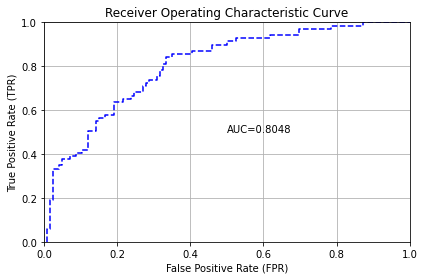

([0.007936507936507936,
  0.007936507936507936,
  0.007936507936507936,
  0.007936507936507936,
  0.007936507936507936,
  0.015873015873015872,
  0.015873015873015872,
  0.015873015873015872,
  0.015873015873015872,
  0.015873015873015872,
  0.015873015873015872,
  0.015873015873015872,
  0.015873015873015872,
  0.015873015873015872,
  0.015873015873015872,
  0.023809523809523808,
  0.023809523809523808,
  0.023809523809523808,
  0.023809523809523808,
  0.023809523809523808,
  0.023809523809523808,
  0.023809523809523808,
  0.023809523809523808,
  0.023809523809523808,
  0.023809523809523808,
  0.023809523809523808,
  0.031746031746031744,
  0.03968253968253968,
  0.03968253968253968,
  0.047619047619047616,
  0.047619047619047616,
  0.047619047619047616,
  0.05555555555555555,
  0.06349206349206349,
  0.07142857142857142,
  0.07142857142857142,
  0.07936507936507936,
  0.0873015873015873,
  0.0873015873015873,
  0.09523809523809523,
  0.10317460317460317,
  0.10317460317460317,
  0.11

In [93]:
%matplotlib inline
aml.leader.model_performance(test_data=test).plot()

In [94]:
#use model to predict on test data
pred = model.predict(test)

#show predictions
pred

#show predictions as pandas dataframe
pred_df = pred.as_data_frame()
pred_df

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict        p0            p1
0          1  0.153518  8.464817e-01
1          1  0.222748  7.772518e-01
2          0  0.999923  7.722380e-05
3          1  0.217736  7.822638e-01
4          0  1.000000  4.600432e-08
..       ...       ...           ...
190        0  0.857129  1.428714e-01
191        1  0.132826  8.671745e-01
192        0  0.980923  1.907687e-02
193        0  0.833177  1.668232e-01
194        1  0.379386  6.206140e-01

[195 rows x 3 columns]

In [95]:
#show predictions as pandas dataframe with actual values
pred_df = pred.as_data_frame()
pred_df['actual'] = test['high_traffic'].as_data_frame()
pred_df

predict        p0            p1  actual
0          1  0.153518  8.464817e-01       1
1          1  0.222748  7.772518e-01       1
2          0  0.999923  7.722380e-05       0
3          1  0.217736  7.822638e-01       1
4          0  1.000000  4.600432e-08       0
..       ...       ...           ...     ...
190        0  0.857129  1.428714e-01       0
191        1  0.132826  8.671745e-01       1
192        0  0.980923  1.907687e-02       0
193        0  0.833177  1.668232e-01       0
194        1  0.379386  6.206140e-01       0

[195 rows x 4 columns]

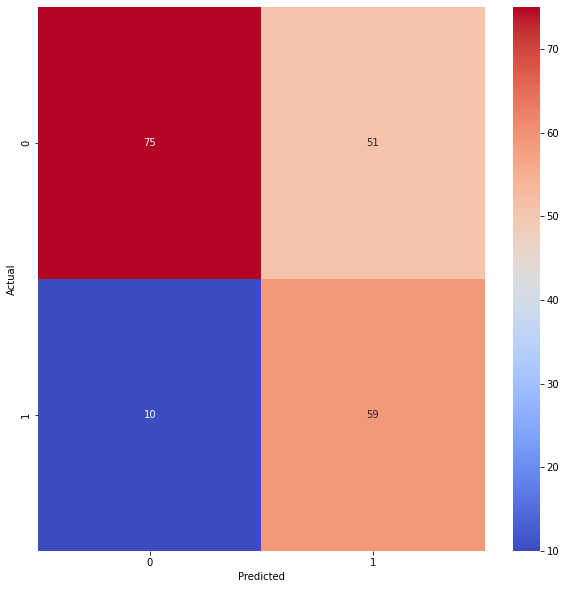

In [96]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred_df['actual'], pred_df['predict'])
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')    
plt.show()

In [97]:
#show classification report
from sklearn.metrics import classification_report
print(classification_report(pred_df['actual'], pred_df['predict']))

              precision    recall  f1-score   support

           0       0.88      0.60      0.71       126
           1       0.54      0.86      0.66        69

    accuracy                           0.69       195
   macro avg       0.71      0.73      0.69       195
weighted avg       0.76      0.69      0.69       195



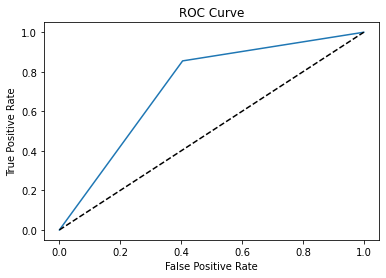

In [98]:
#show roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(pred_df['actual'], pred_df['predict'])
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [99]:
#show auc score
from sklearn.metrics import roc_auc_score
roc_auc_score(pred_df['actual'], pred_df['predict'])

0.7251552795031055

In [100]:
#show accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(pred_df['actual'], pred_df['predict'])

0.6871794871794872

In [101]:

#show precision score
from sklearn.metrics import precision_score
precision_score(pred_df['actual'], pred_df['predict'])

0.5363636363636364

In [102]:
#show recall score
from sklearn.metrics import recall_score
recall_score(pred_df['actual'], pred_df['predict'])

0.855072463768116

In [103]:
#show f1 score
from sklearn.metrics import f1_score    
f1_score(pred_df['actual'], pred_df['predict'])

0.6592178770949721

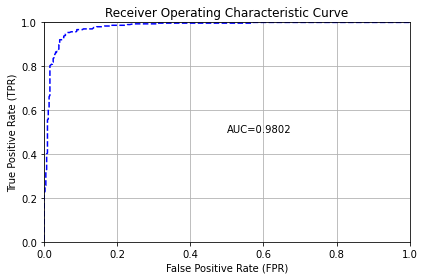

In [106]:
# Assuming you've already defined your model
perf = model.model_performance()

# Plot the AUC curve
perf.plot()

# Display the plot
import matplotlib.pyplot as plt
plt.show()


In [107]:
h2o.shutdown()

H2O session _sid_8e29 closed.


/var/folders/ks/5bc1x9p158vgc4774v7r2tq40000gn/T/ipykernel_20741/2900054706.py:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


In [108]:
pip install auto-sklearn


Note: you may need to restart the kernel to use updated packages.


In [109]:
import autosklearn.classification


In [110]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing the data
X = df.drop('high_traffic', axis=1)
y = df['high_traffic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [111]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=600,
    per_run_time_limit=150,
    ensemble_size=1,
    memory_limit=None,  # Disabling memory limit
    metric=autosklearn.metrics.f1
)

automl.fit(X_train, y_train)

/var/folders/ks/5bc1x9p158vgc4774v7r2tq40000gn/T/ipykernel_20741/2387204897.py:1: DeprecationWarning: `ensemble_size` has been deprecated, please use `ensemble_kwargs = {'ensemble_size': 1}`. Inserting `ensemble_size` into `ensemble_kwargs` for now. `ensemble_size` will be removed in auto-sklearn 0.16.
  automl = autosklearn.classification.AutoSklearnClassifier(


AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      ensemble_kwargs={'ensemble_size': 1}, ensemble_size=1,
                      memory_limit=None, metric=f1, per_run_time_limit=150,
                      time_left_for_this_task=600)

In [112]:
print(automl.show_models())


{46: {'model_id': 46, 'rank': 1, 'cost': 0.30593607305936077, 'ensemble_weight': 1.0, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fe191fda160>, 'balancing': Balancing(random_state=1), 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fe191c09550>, 'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7fe191c09a00>, 'sklearn_classifier': BernoulliNB(alpha=1.611967354876467, fit_prior=False)}}


In [ ]:
# Extract the results into a DataFrame
import pandas as pd
results_df = pd.DataFrame(automl.cv_results_)

# Display models and their F1 scores
for index, row in results_df.iterrows():
    model_name = row['params']['classifier:__choice__']
    f1_score = row['mean_test_score']
    print(f"Model: {model_name}, F1 Score: {f1_score:.4f}")


In [ ]:
unique_models = results_df['params'].apply(lambda x: x['classifier:__choice__']).unique()
print("Unique models evaluated:")
for model in unique_models:
    print(model)


In [ ]:
pip install pipelineprofiler

In [ ]:
import PipelineProfiler
# automl is an object Which has already been created.
profiler_data= PipelineProfiler.import_autosklearn(automl)
PipelineProfiler.plot_pipeline_matrix(profiler_data)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    "multi_class": ["auto", "ovr", "multinomial"]
}

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=5000)

# Set up the grid search
grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='f1')

# Fit the model using the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the associated accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron, SGDClassifier

# Define the list of models
model_list = [
    LogisticRegression(), 
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LinearSVC(),
    Perceptron(), 
    SGDClassifier(),
    ExtraTreesClassifier()

]

# Define a pipeline with a scaler and a placeholder for the classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # You can change this to MinMaxScaler() if needed
    ('classifier', LogisticRegression())  # Placeholder
])

# List to store F1 scores for each model
f1_scores = {}

# Iterate over each model, train it, and collect its F1 score
for model in model_list:
    # Set the classifier in the pipeline
    pipeline.set_params(classifier=model)
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)
    
    # Compute and store the F1 score
    f1_scores[type(model).__name__] = f1_score(y_test, y_pred)

f1_scores


In [ ]:
# scatterplot of calories vs. sugar
sns.regplot(x='calories', y='sugar', data=df, scatter=True)

In [ ]:
#scatterplot of calories vs. carbohydrates
sns.regplot(x='calories', y='carbohydrate', data=df, scatter=True)

In [ ]:
#scatterplot of calories vs. carbohydrates and color by high traffic
sns.lmplot(x='calories', y='carbohydrate', data=df, fit_reg=False, hue='high_traffic', legend=False)

In [ ]:
# plot bar chart  of calories, color change in bar with variable high_traffic
sns.barplot(x='calories', y='high_traffic', data=df)


In [ ]:
# Plotting the distribution of recipes across different categories
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index, palette="viridis")
plt.title("Distribution of Recipes Across Categories")
plt.xlabel("Category")
plt.ylabel("Number of Recipes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
